In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import joblib
pd.pandas.set_option('display.max_columns', None)

In [3]:
df = pd.read_json(r'loan_data.json')

In [5]:
df.head()

,Application_ID,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Income,Application_Status
0,LP001002,Male,No,0,Graduate,No,1,Urban,medium,Y
1,LP001003,Male,Yes,1,Graduate,No,1,Rural,medium,N
2,LP001005,Male,Yes,0,Graduate,Yes,1,Urban,low,Y
3,LP001006,Male,Yes,0,Not Graduate,No,1,Urban,low,Y
4,LP001008,Male,No,0,Graduate,No,1,Urban,medium,Y


In [6]:
df.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 511 entries, 0 to 510
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Application_ID      511 non-null    object
 1   Gender              511 non-null    object
 2   Married             511 non-null    object
 3   Dependents          511 non-null    object
 4   Education           511 non-null    object
 5   Self_Employed       511 non-null    object
 6   Credit_History      511 non-null    int64 
 7   Property_Area       511 non-null    object
 8   Income              511 non-null    object
 9   Application_Status  511 non-null    object
dtypes: int64(1), object(9)
memory usage: 40.0+ KB


In [41]:

#(1)Find % of total applicants for each unique value of dependents
#(2) Find the average value of dependents per applicant
print(df['Married'].unique())

l = len(df.index)
print(l)
ans_1 = {}
df_groups = df.groupby('Dependents')
dep_map = {'0':0,'1':1,'2':2,'3+':3}

count = 0
for one in df_groups:
    #print(one)
    ans_1[one[0]] =  str(round((len(one[1].index)*1.0/l) * 100,3)) + ' %'
    count += dep_map[one[0]] * len(one[1].index)
print(count)
print(ans_1)
print(f"average number of dependents per applicant : {count/l}")

['No' 'Yes']
511
393
{'0': '57.534 %', '1': '16.634 %', '2': '17.221 %', '3+': '8.611 %'}
average number of dependents per applicant : 0.7690802348336595


In [8]:
#3. Find the %of applications approved for self-employed applicants
df_self_emp = df.loc[df['Self_Employed'] == 'Yes', 'Application_Status']
print(f"the %of applications approved for self-employed applicants {round((df_self_emp.value_counts()['Y'] / l * 100), 3)} %" )

the %of applications approved for self-employed applicants 9.002 %


In [42]:
df['Dependents'].nunique()

4

In [9]:
#(4) What is the % of rejections for married male applicants
dfx = df.loc[(df["Married"] == 'Yes') & (df["Gender"] == "Male"), "Application_Status"]
print(f"the % of rejections for married male applicants {round((dfx.value_counts()['N'] / l * 100), 3)} %" )

the % of rejections for married male applicants 17.025 %


In [10]:
#(5)Which property area has the maximum approval ratio
ans_x = {}
for one in df.groupby('Property_Area'):
    count = one[1]['Application_Status'].value_counts()['Y']
    ans_x[one[0]] = round((count*1.0/ l) * 100,3)

# print(ans_x)
print(f"property area has the maximum approval ratio is: {max(ans_x, key = ans_x.get) }")

property area has the maximum approval ratio is: Semiurban


In [11]:
#(6) Find average dependents per income group
ans_x = {}
count = 0
for one in df.groupby('Income'):
    # print(one[0])
    deps = one[1]['Dependents']
    one[1]['Dependents'] =  one[1].loc[df['Dependents'] == '1', 'Dependents'] = 1
    one[1]['Dependents'] =  one[1].loc[df['Dependents'] == '0', 'Dependents'] = 0
    one[1]['Dependents'] =  one[1].loc[df['Dependents'] == '2', 'Dependents'] = 2
    one[1]['Dependents'] =  one[1].loc[df['Dependents'] == '3+', 'Dependents'] = 3
    # print(one[1]['Dependents'])
    ans_x[one[0]] = one[1]['Dependents'].sum()
    count += one[1]['Dependents'].sum()
ans_x  = {k: round((v*1.0/count) * 100,3) for k, v in ans_x.items()}
print(f"  average dependents per income group :{ans_x}")

  average dependents per income group :{'high': 8.806, 'low': 53.425, 'medium': 37.769}


# (7) Creating a simple predictive model whether a loan application will be approved or rejected.

In [12]:
df.head()

,Application_ID,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Income,Application_Status
0,LP001002,Male,No,0,Graduate,No,1,Urban,medium,Y
1,LP001003,Male,Yes,1,Graduate,No,1,Rural,medium,N
2,LP001005,Male,Yes,0,Graduate,Yes,1,Urban,low,Y
3,LP001006,Male,Yes,0,Not Graduate,No,1,Urban,low,Y
4,LP001008,Male,No,0,Graduate,No,1,Urban,medium,Y


In [13]:
## Dropping Application_ID
df = df.drop(columns=['Application_ID'])

In [24]:
#categorical Variable
Cat_var = ['Gender','Married','Dependents' , 'Education' ,'Self_Employed','Property_Area','Income' ,]
# i dont have any information about the ##Credit_History## in df.info it shows integer type but its look like categorical variable



print(Cat_var)

['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Income']


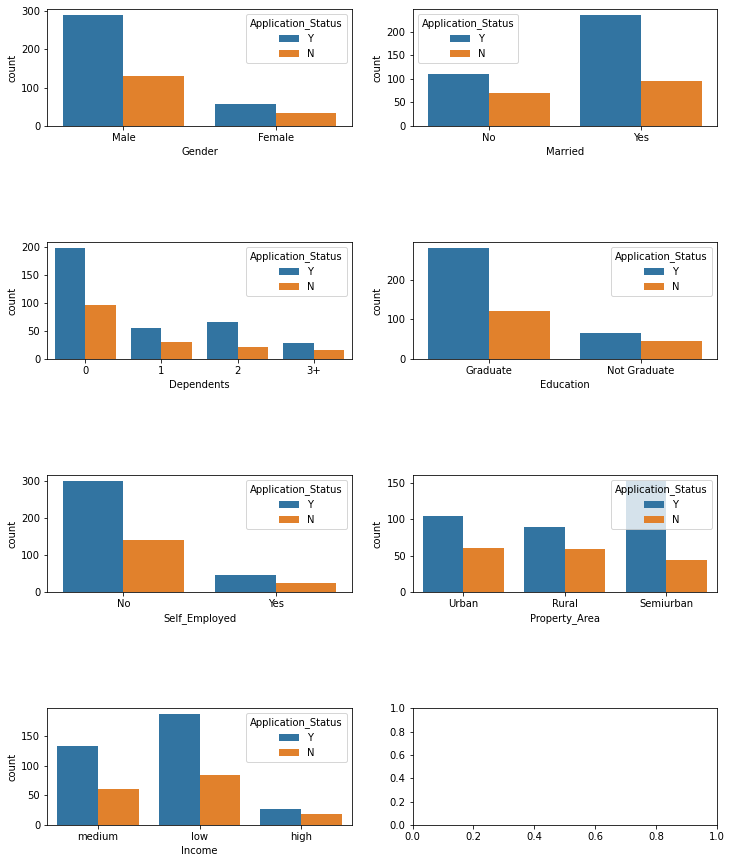

In [28]:
## data Visualisation
### Data Visualization libraries
import seaborn as sns



fig,axes = plt.subplots(4,2,figsize=(12,15))
for idx,cat_col in enumerate(Cat_var):
    row,col = idx//2,idx%2
    sns.countplot(x=cat_col,data=df,hue='Application_Status',ax=axes[row,col])


plt.subplots_adjust(hspace=1)

In [38]:
# we can get the Valuable insight from the plot
# As it was not mentioned in the question i am not explaing.

In [29]:
#### Encoding categrical Features: ##########
df_encoded = pd.get_dummies(df,drop_first=True)
df_encoded.head()

,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Income_low,Income_medium,Application_Status_Y
0,1,1,0,0,0,0,0,0,0,1,0,1,1
1,1,1,1,1,0,0,0,0,0,0,0,1,0
2,1,1,1,0,0,0,0,1,0,1,1,0,1
3,1,1,1,0,0,0,1,0,0,1,1,0,1
4,1,1,0,0,0,0,0,0,0,1,0,1,1


In [32]:
df_encoded.shape

(511, 13)

In [33]:
########## Split Features and Target Varible ############
X = df_encoded.drop(columns='Application_Status_Y')
y = df_encoded['Application_Status_Y']

################# Splitting into Train -Test Data #######

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,stratify =y,random_state =42)

# As there is no Missing values so no imputation is done.


### Random Forest Classifier

In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,f1_score


random_clf = RandomForestClassifier(n_estimators=100,max_depth=3,min_samples_leaf = 10)
random_clf.fit(X_train,y_train)
y_pred = random_clf.predict(X_train)
print("Train F1 Score ", f1_score(y_train,y_pred))
print("Train Accuracy ", accuracy_score(y_train,y_pred))

print("Validation Mean F1 Score: ",cross_val_score(random_clf,X_train,y_train,cv=5,scoring='f1_macro').mean())
print("Validation Mean Accuracy: ",cross_val_score(random_clf,X_train,y_train,cv=5,scoring='accuracy').mean())

Train F1 Score  0.860759493670886
Train Accuracy  0.7843137254901961
Validation Mean F1 Score:  0.7033079665229464
Validation Mean Accuracy:  0.7842517314062029


In [37]:
y_pred = random_clf.predict(X_test)
print("Test Accuracy: ",accuracy_score(y_test,y_pred))
print("Test F1 Score: ",f1_score(y_test,y_pred))
print("Confusion Matrix on Test Data")
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Test Accuracy:  0.8446601941747572
Test F1 Score:  0.8974358974358974
Confusion Matrix on Test Data


Predicted,0,1,All
True,,,
0,17,16,33
1,0,70,70
All,17,86,103
